Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free under certain conditions — see the [`license`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [2]:
import logging
from itertools import combinations
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import networkx as nx
import matplotlib.pyplot as plt
from icecream import ic
import math
from queue import PriorityQueue

logging.basicConfig(level=logging.DEBUG)

In [4]:
CITIES = pd.read_csv('italy.csv', header=None, names=['name', 'lat', 'lon'])
DIST_MATRIX = np.zeros((len(CITIES), len(CITIES)))
for c1, c2 in combinations(CITIES.itertuples(), 2):
    DIST_MATRIX[c1.Index, c2.Index] = DIST_MATRIX[c2.Index, c1.Index] = geodesic(
        (c1.lat, c1.lon), (c2.lat, c2.lon)
    ).km
CITIES.head()

,name,lat,lon
0,Ancona,43.60,13.50
1,Andria,41.23,16.29
2,Bari,41.12,16.87
3,Bergamo,45.70,9.67
4,Bologna,44.50,11.34


## Lab3F

In [5]:
median = np.median(DIST_MATRIX.reshape(1, -1))
ic(median)
# DIST_MATRIX[DIST_MATRIX > median] = np.inf
G = nx.Graph()
for c1, c2 in combinations(CITIES.itertuples(), 2):
    G.add_node(c1)
    G.add_node(c2)
    if DIST_MATRIX[c1.Index, c2.Index] <= median:
        G.add_edge(c1, c2)
nx.is_connected(G)

ic| median: np.float64(367.0694334013403)


True

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\ldora\\Documents\\xhoanaVE\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\ldora\\Documents\\xhoanaVE\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\ldora\\Documents\\xhoanaVE\\Lib\\si

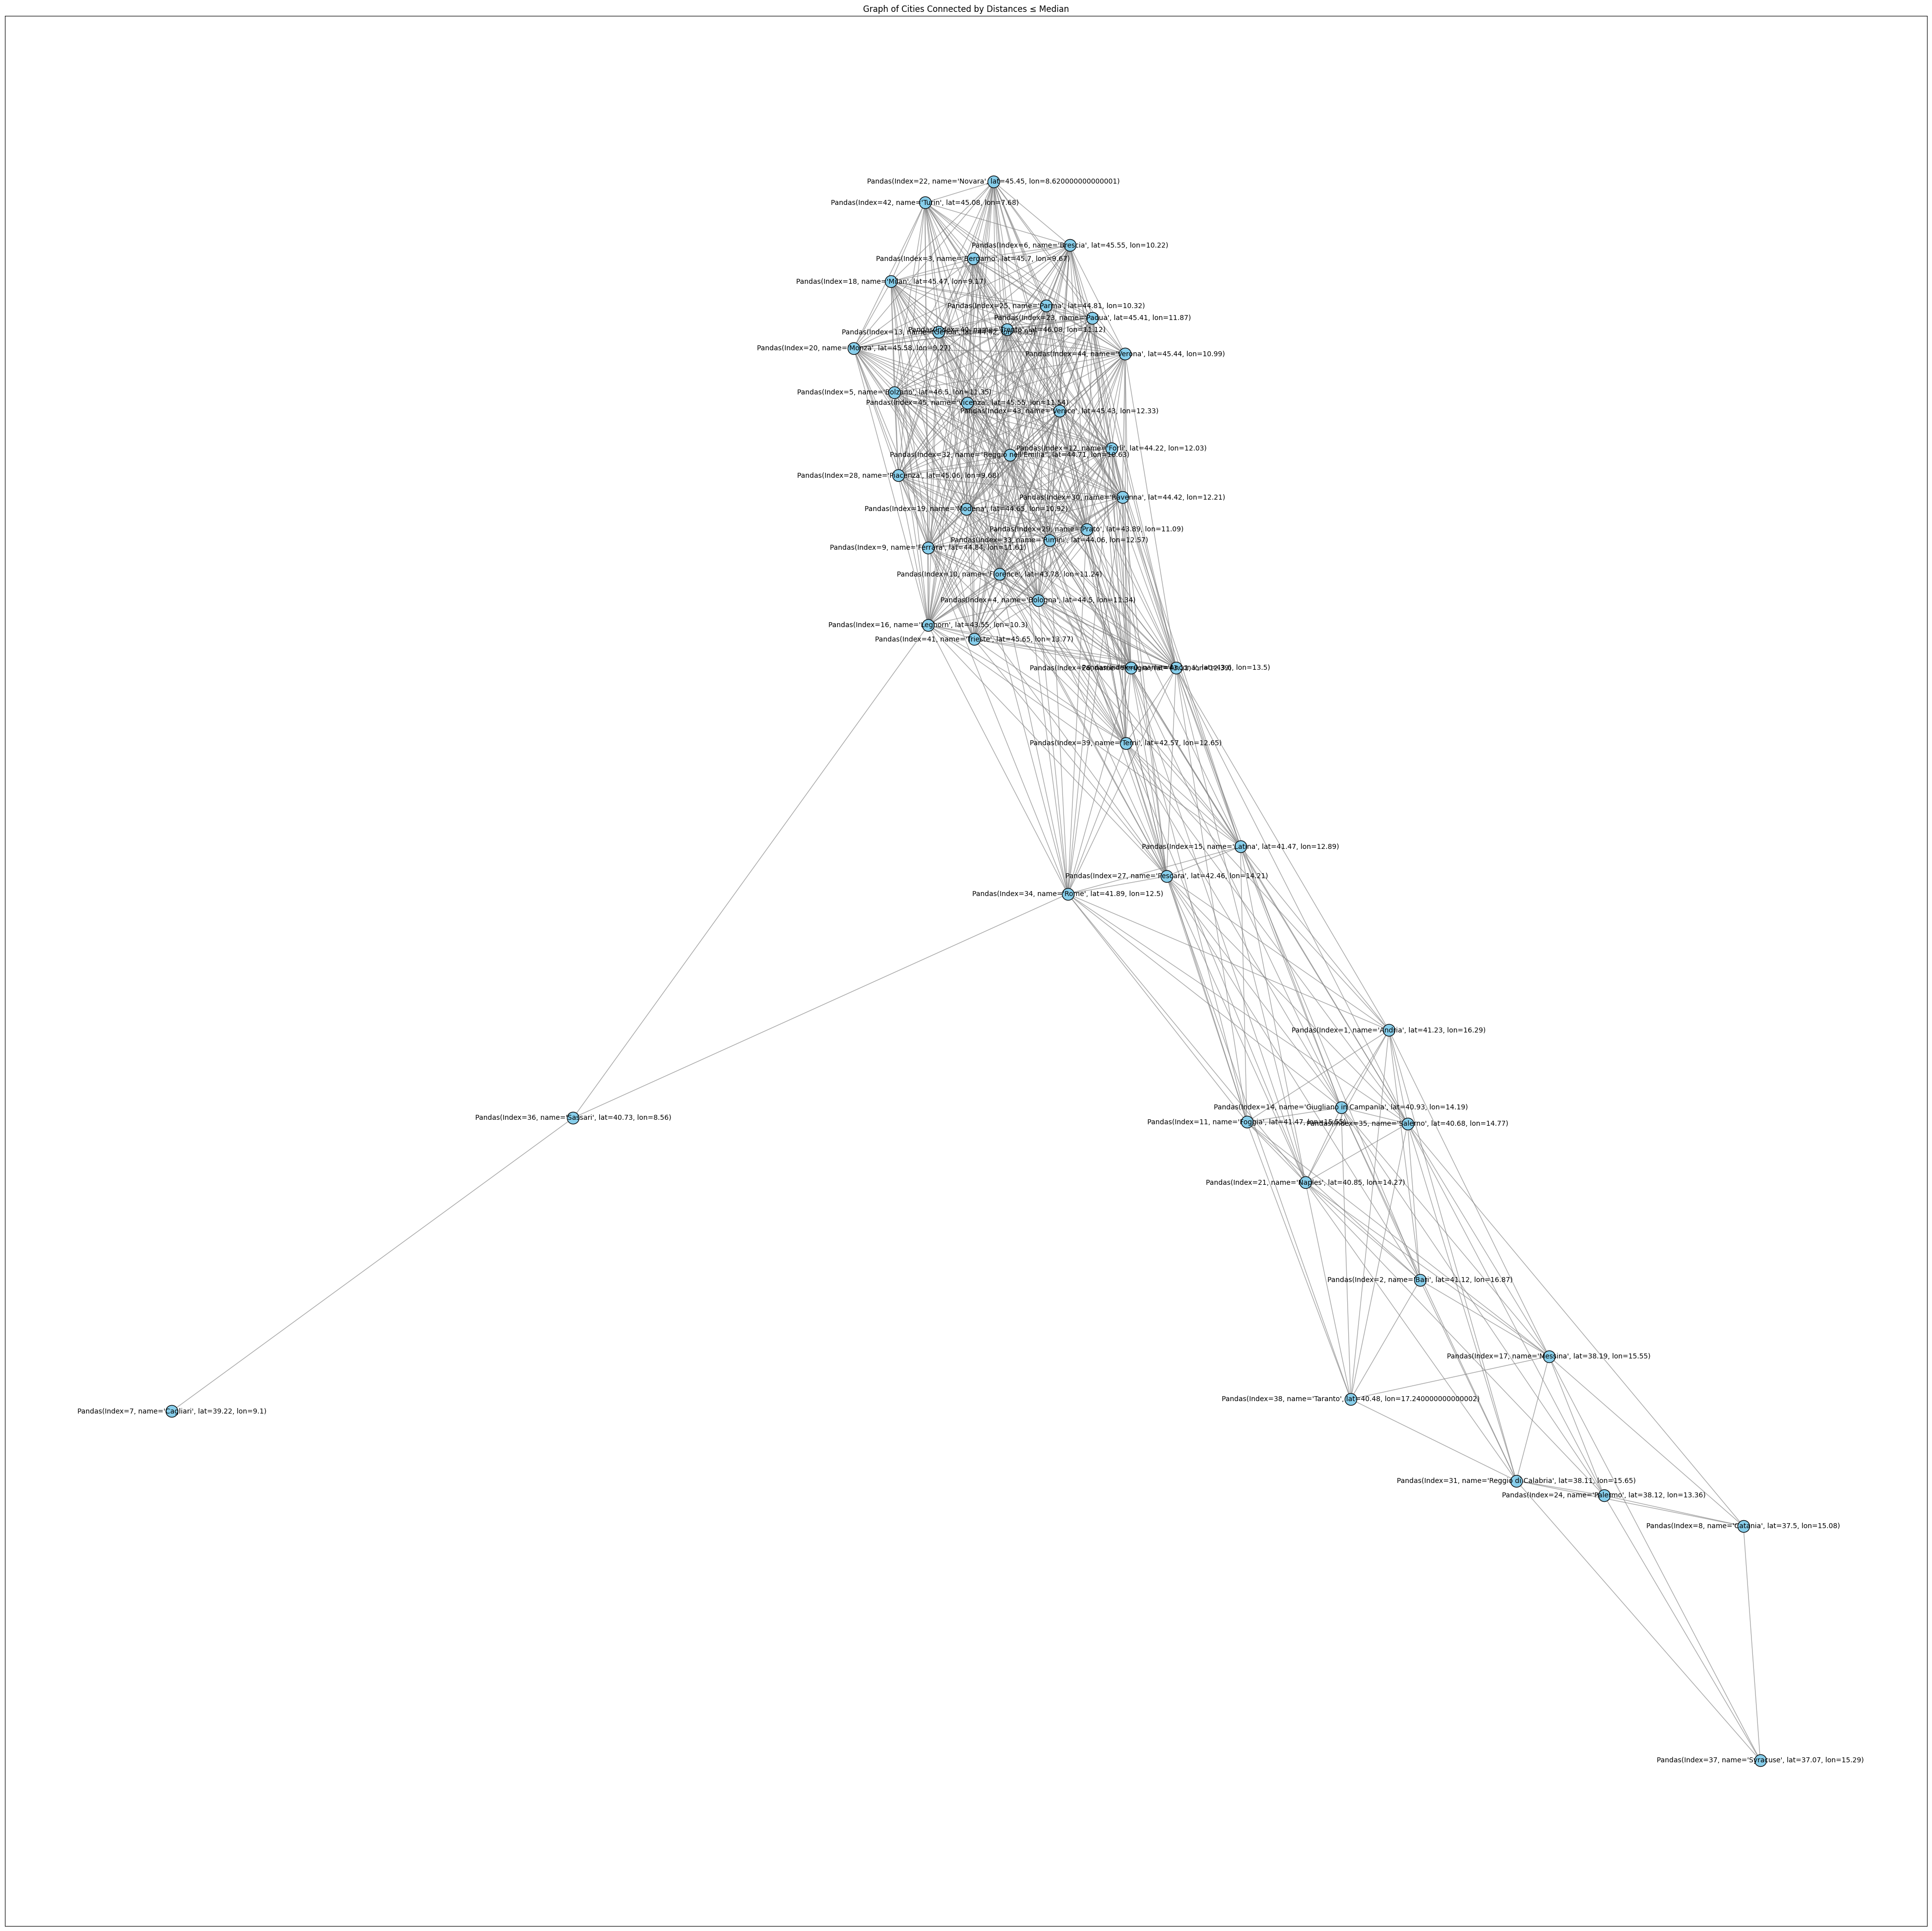

In [6]:

# Set up the plot figure
plt.figure(figsize=(50, 50))  # Adjust size as needed for clarity

# Choose a layout for visual appeal and readability
pos = nx.spring_layout(G, seed=42)  # Spring layout positions nodes for a clear visual

# Draw nodes, edges, and labels with customization options
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='skyblue', edgecolors='black')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Display the graph
plt.title("Graph of Cities Connected by Distances ≤ Median")
plt.show()


In [7]:


# Helper function to get the node in `G` based on city name
def get_city_node_by_name(city_name):
    # Find the node in G that matches the city name in CITIES
    return next(node for node in G.nodes if node.name == city_name)

def dijkstra(graph, start_city_name, goal_city_name):
    # Get the start and goal nodes based on city names
    start_city = get_city_node_by_name(start_city_name)
    goal_city = get_city_node_by_name(goal_city_name)

    # Find the shortest path based on hops
    shortest_path = nx.shortest_path(graph, source=start_city, target=goal_city)
    
    # Calculate the total distance using the DIST_MATRIX
    total_distance = sum(
        DIST_MATRIX[shortest_path[i].Index, shortest_path[i + 1].Index] 
        for i in range(len(shortest_path) - 1)
    )
    
    return shortest_path, total_distance

# Example usage
start_city_name = "Turin"  # Replace with the name of your start city
goal_city_name = "Catania"   # Replace with the name of your goal city

shortest_path, total_distance = dijkstra(G, start_city_name, goal_city_name)
print("Shortest path:", [city.name for city in shortest_path])
print("Total distance in km:", total_distance)


Shortest path: ['Turin', 'Bologna', 'Ancona', 'Salerno', 'Catania']
Total distance in km: 1191.5379974844836
